## **The start of analysis with all empty values handled with knn**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
from sklearn.impute import KNNImputer
# suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2= pd.DataFrame(dataCo2)
except:
    FileNotFoundError 
    print("data can´t be found")

print(dataCo2) # to see the basic structure of the data
dataCo2 = dataCo2.drop(["UN M49"], axis=1) # This is recommended by the author as the column is not yet reliable.

           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [68]:
data = dataCo2.select_dtypes(include=[np.number,"float"]).columns.to_list()
selected_data= dataCo2[data]
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
after_imputation=imputer.fit_transform(selected_data)
imputed_dataframe= pd.DataFrame(after_imputation,columns=data)
# This cell takes a very long time to run (around 3 min) so don´t run all cells if possible

In [69]:
print(imputed_dataframe)
Knn_dataset=pd.concat([dataCo2["Country"],dataCo2["ISO 3166-1 alpha-3"],imputed_dataframe],axis=1) # add back Country and iso code to the dataset again

         Year         Total          Coal           Oil          Gas  \
0      1750.0      5.603821      9.386300      0.000000     0.000000   
1      1751.0      5.663925      9.426146      0.000000     0.000000   
2      1752.0      5.683513      9.487057      0.000000     0.000000   
3      1753.0      5.745230      9.592979      0.000000     0.000000   
4      1754.0      5.852126      9.732917      0.000000     0.000000   
...       ...           ...           ...           ...          ...   
61420  2018.0  36766.912297  14725.249126  12267.151230  7498.324347   
61421  2019.0  37039.881946  14684.277641  12377.248495  7621.995402   
61422  2020.0  35007.822458  14225.918061  10899.216217  7556.077650   
61423  2021.0  36815.680623  14982.537322  11513.189924  7922.817236   
61424  2022.0  37150.949699  15222.908123  11876.300292  7747.715288   

            Cement     Flaring       Other  Per Capita  
0         0.000000    0.000000    1.965780    0.011583  
1         0.000000   

In [70]:
Knn_dataset=Knn_dataset.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total":"Total Co2 Emission (Mt)", "Per Capita":"Per Capita (t)"},axis=1)
Knn_dataset=Knn_dataset.dropna()
print("number of nan values per column\n",Knn_dataset.isna().sum()) # check for nan values.

number of nan values per column
 Country                    0
ISO Code                   0
Year                       0
Total Co2 Emission (Mt)    0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita (t)             0
dtype: int64


In [71]:
print(Knn_dataset) 

           Country ISO Code    Year  Total Co2 Emission (Mt)          Coal  \
0      Afghanistan      AFG  1750.0                 5.603821      9.386300   
1      Afghanistan      AFG  1751.0                 5.663925      9.426146   
2      Afghanistan      AFG  1752.0                 5.683513      9.487057   
3      Afghanistan      AFG  1753.0                 5.745230      9.592979   
4      Afghanistan      AFG  1754.0                 5.852126      9.732917   
...            ...      ...     ...                      ...           ...   
61420       Global      WLD  2018.0             36766.912297  14725.249126   
61421       Global      WLD  2019.0             37039.881946  14684.277641   
61422       Global      WLD  2020.0             35007.822458  14225.918061   
61423       Global      WLD  2021.0             36815.680623  14982.537322   
61424       Global      WLD  2022.0             37150.949699  15222.908123   

                Oil          Gas       Cement     Flaring      

In [72]:
for country in Knn_dataset["Country"].unique(): # Here we learn that global (total emission for world) has unique rows and if we don´t remove them we will get duplicate emission
    print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bonaire, Saint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
North Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Micronesia (Federated States of)
Fiji
Finland
Panama Canal Zone
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iraq
Ireland
Iran
Israel
Italy
Jamaica
J

In [73]:
drop_global= Knn_dataset[(Knn_dataset["Country"]=="Global")].index 
print(Knn_dataset.drop(drop_global).drop(columns=['Year']).mean()) 
# This is to avoid duplicates in the emission results since global is the combined value for everything. If we don´t remove it the result get´s twice as high as it should be.

Total Co2 Emission (Mt)    52.890997
Coal                       31.655306
Oil                        13.761423
Gas                         5.149298
Cement                      0.869705
Flaring                     0.357446
Other                       1.721707
Per Capita (t)              2.196097
dtype: float64


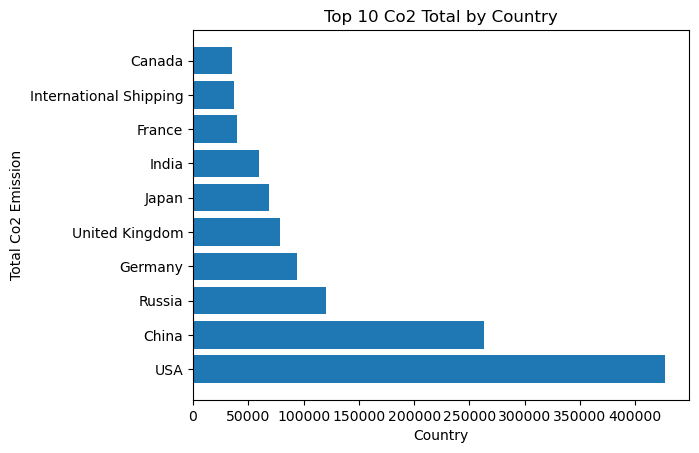

In [74]:

top_10 = Knn_dataset.drop(drop_global,inplace=True) # remove global since we want to examine countries and not the world as a whole
top_10 = Knn_dataset.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index() # Add the total emission per country and select the ten highest values

plt.barh(y=top_10["Country"],width=top_10['Total Co2 Emission (Mt)'])
plt.xlabel('Country')
plt.ylabel('Total Co2 Emission')
plt.title('Top 10 Co2 Total by Country')

plt.show()

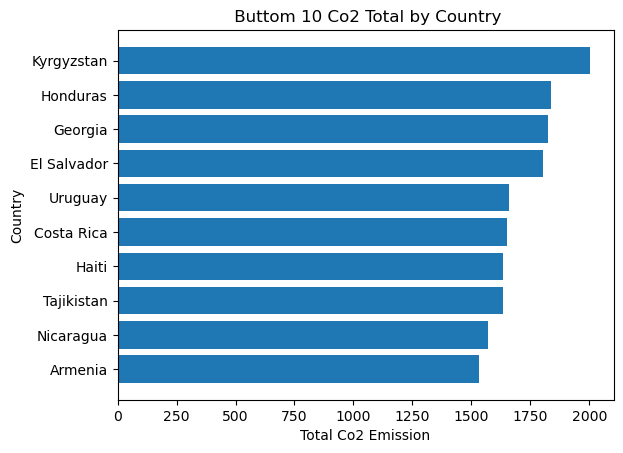

In [75]:
 # remove global since we want to examine countries and not the world as a whole
buttom_10 = Knn_dataset.groupby('Country')['Total Co2 Emission (Mt)'].sum().nsmallest(10).reset_index() # Add the total emission per country and select the ten highest values

plt.barh(y=buttom_10["Country"],width=buttom_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission')
plt.ylabel('Country')
plt.title(' Buttom 10 Co2 Total by Country')

plt.show()